In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

In [3]:
cdc_diabetes_health_indicators.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes ch...,None,no
5,BMI,Feature,Integer,None,Body Mass Index,None,no
6,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in you...,None,no
7,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
8,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial inf...,None,no
9,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not includ...,None,no


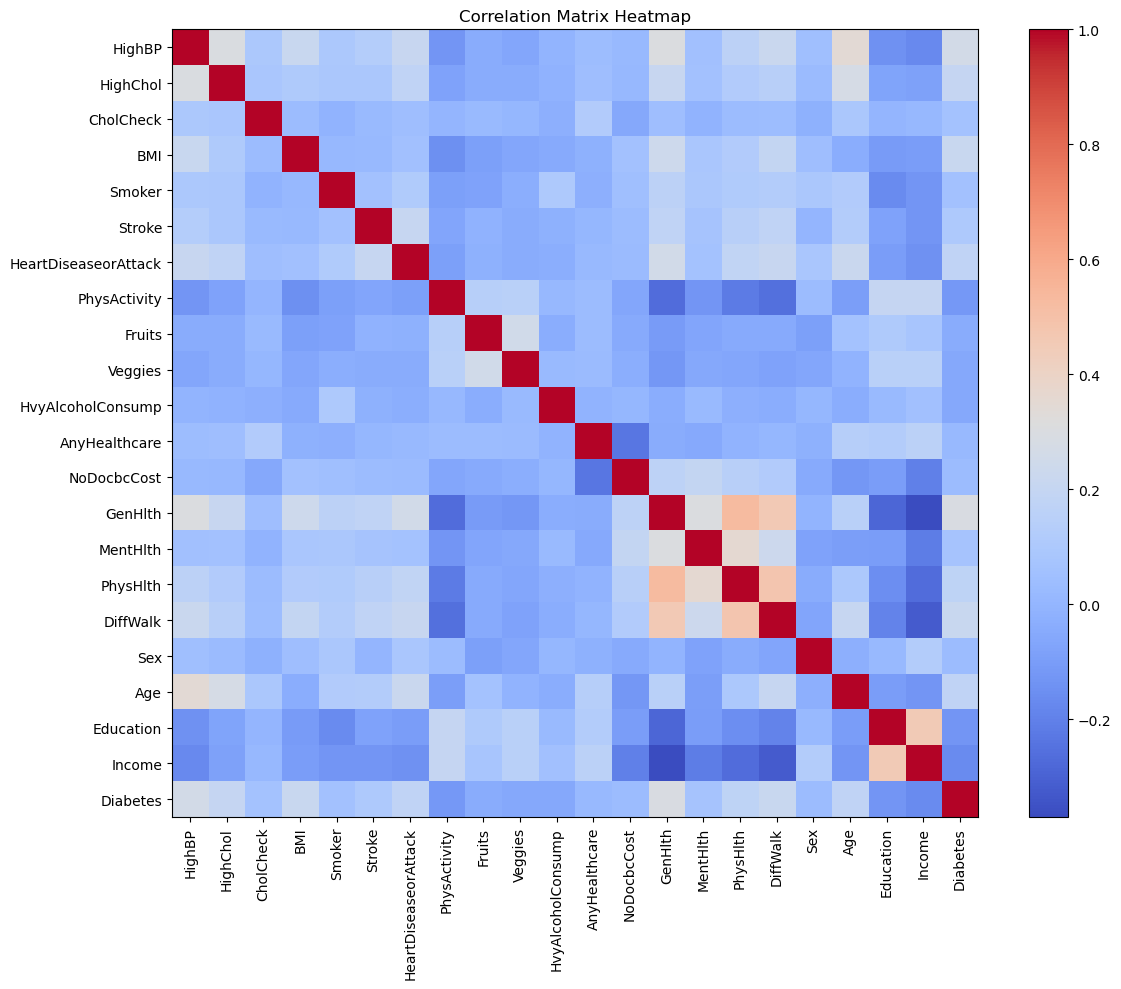

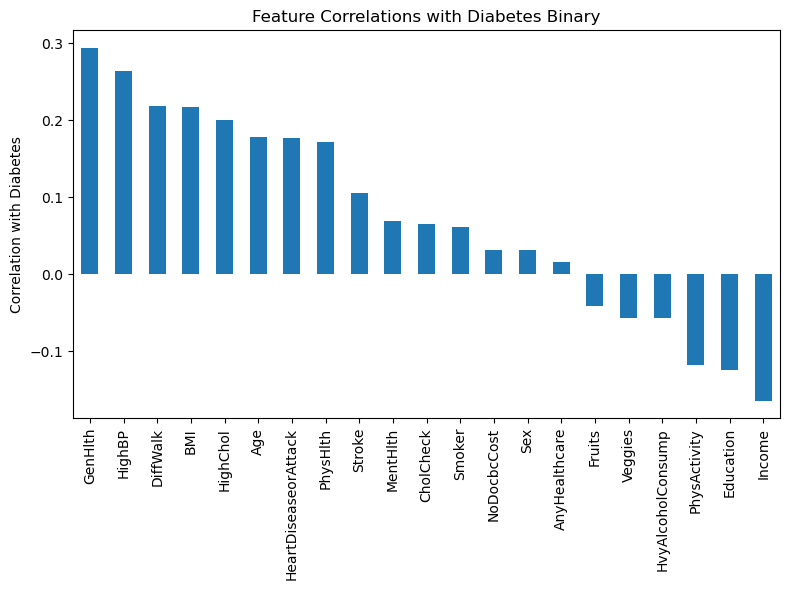

In [4]:
df = X.copy()
df['Diabetes'] = y

# 1. Correlation Matrix Heatmap (using only numerical columns)
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# 2. Feature-to-Target Correlations Bar Chart
target_corr = corr_matrix['Diabetes'].drop('Diabetes').sort_values(ascending=False)

plt.figure(figsize=(8, 6))
target_corr.plot(kind='bar')
plt.ylabel('Correlation with Diabetes')
plt.title('Feature Correlations with Diabetes Binary')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

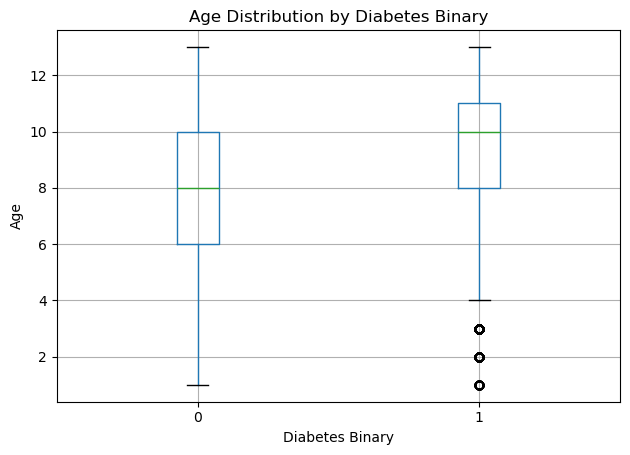

<Figure size 800x600 with 0 Axes>

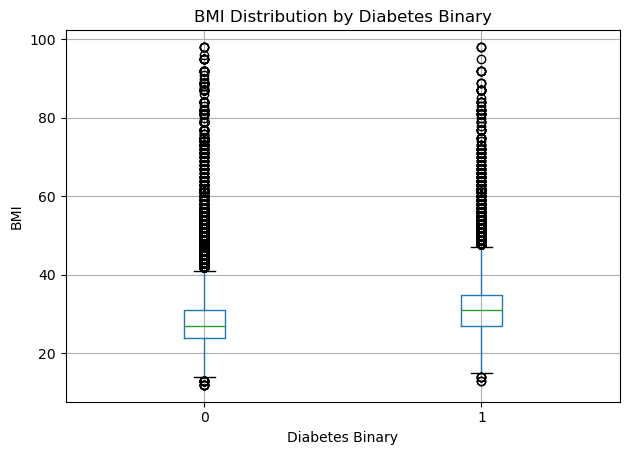

<Figure size 800x600 with 0 Axes>

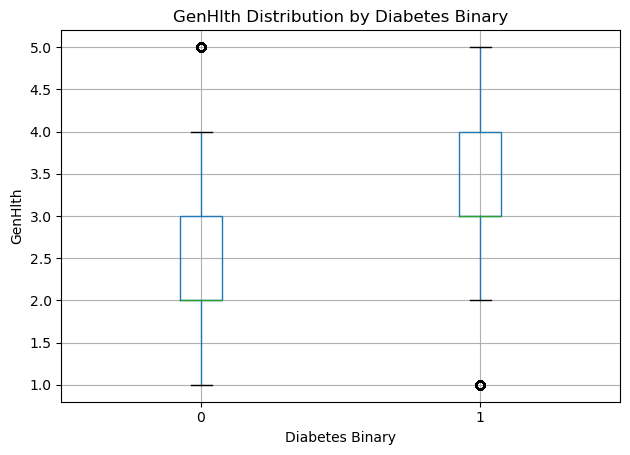

<Figure size 800x600 with 0 Axes>

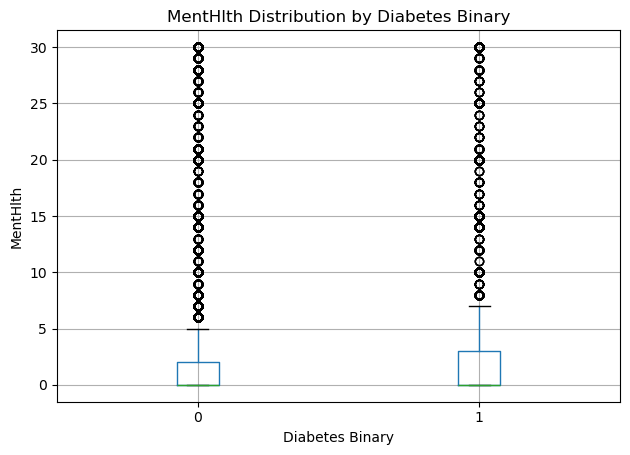

<Figure size 800x600 with 0 Axes>

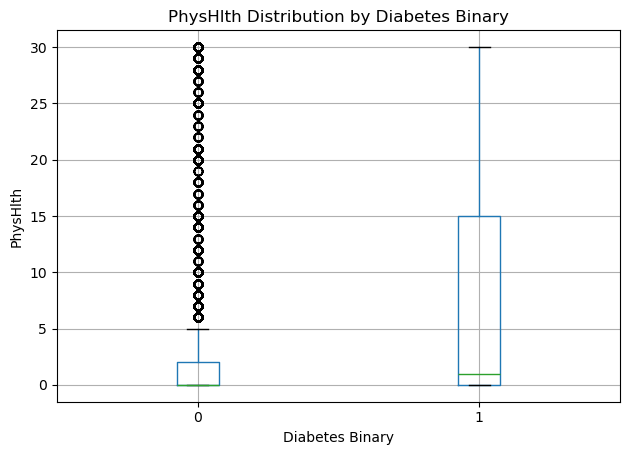

<Figure size 800x600 with 0 Axes>

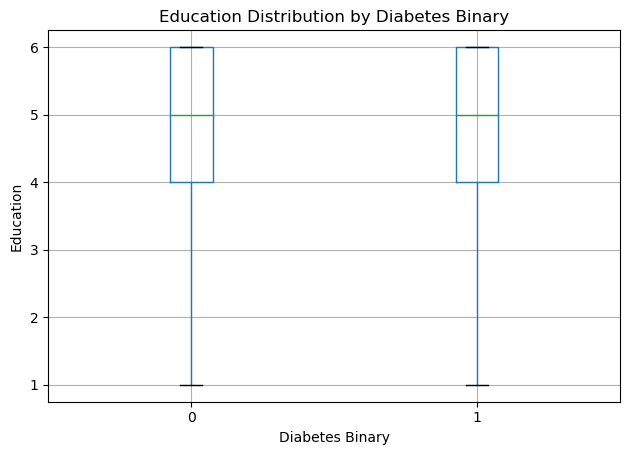

<Figure size 800x600 with 0 Axes>

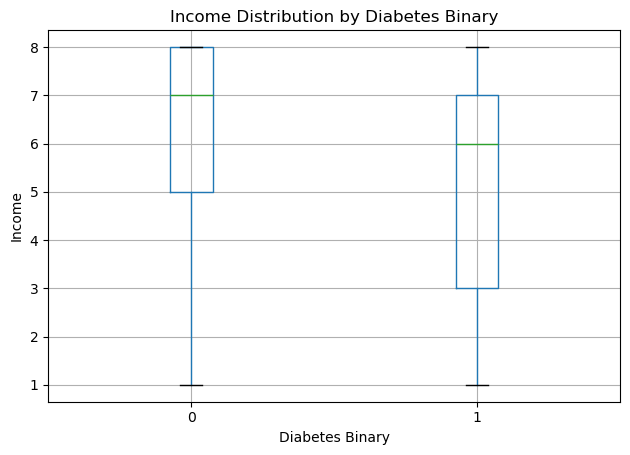

In [5]:
features_to_plot = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=feature, by='Diabetes')
    plt.title(f'{feature} Distribution by Diabetes Binary')
    plt.suptitle('')  # Removes the automatic suptitle
    plt.xlabel('Diabetes Binary')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

In [6]:
cdc_diabetes_health_indicators.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes ch...,None,no
5,BMI,Feature,Integer,None,Body Mass Index,None,no
6,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in you...,None,no
7,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
8,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial inf...,None,no
9,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not includ...,None,no


Identified binary columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


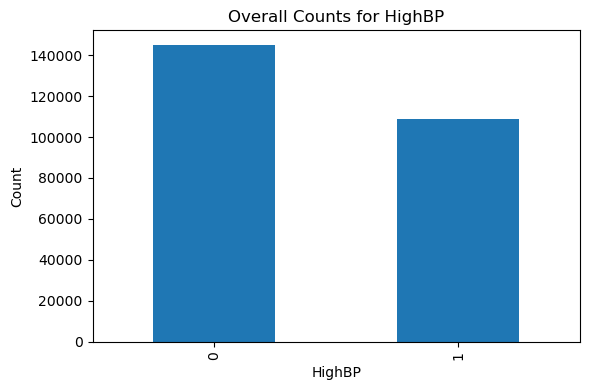

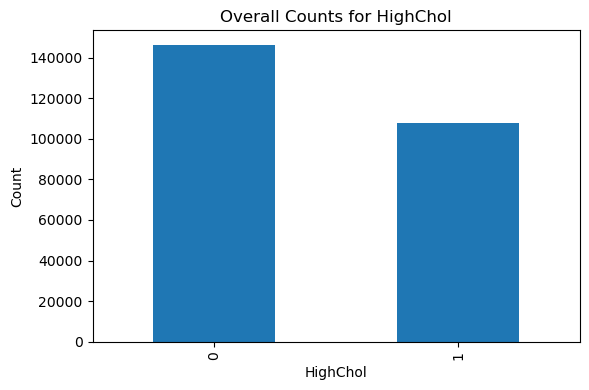

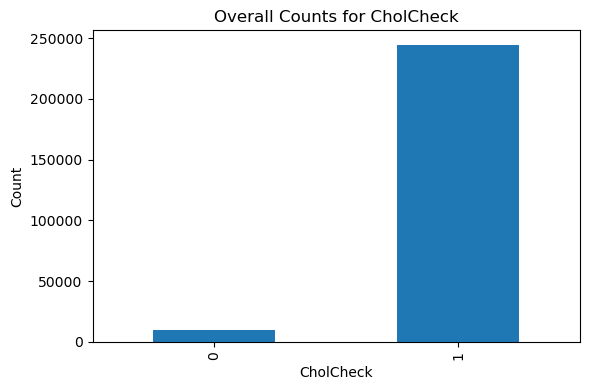

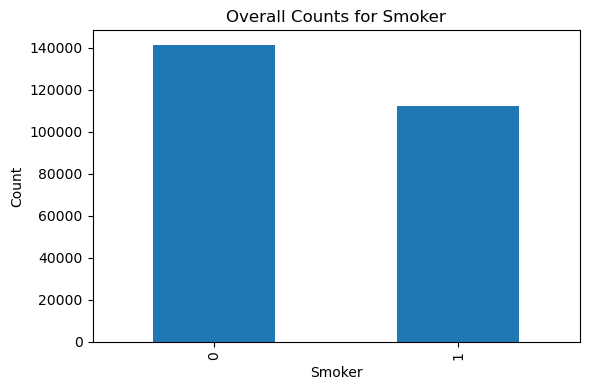

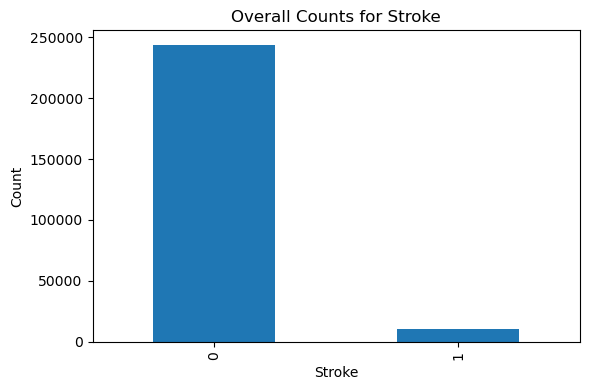

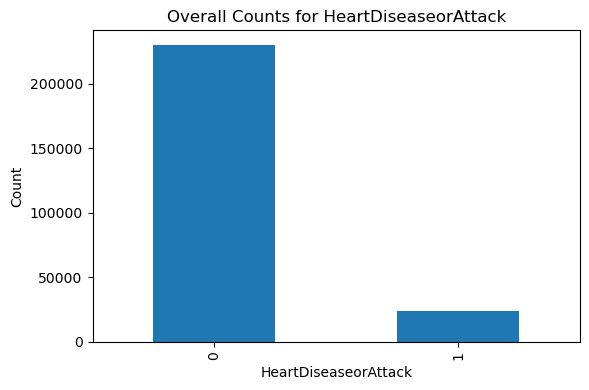

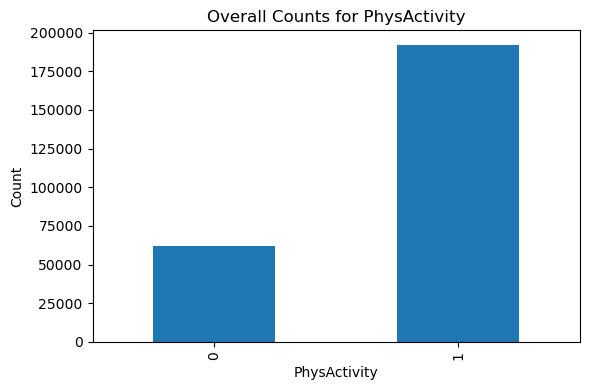

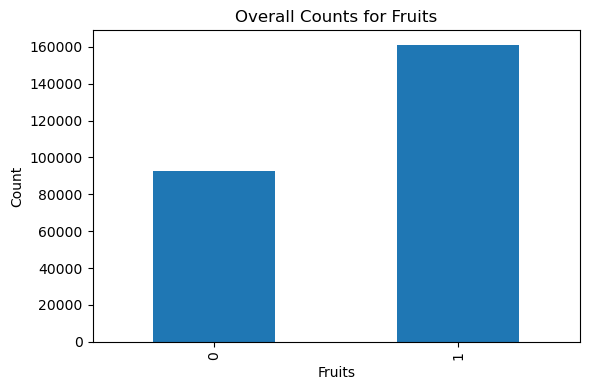

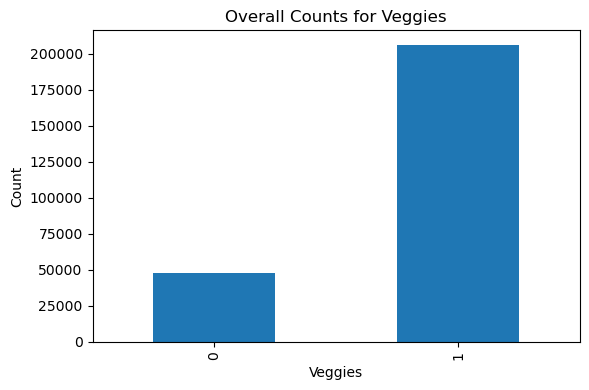

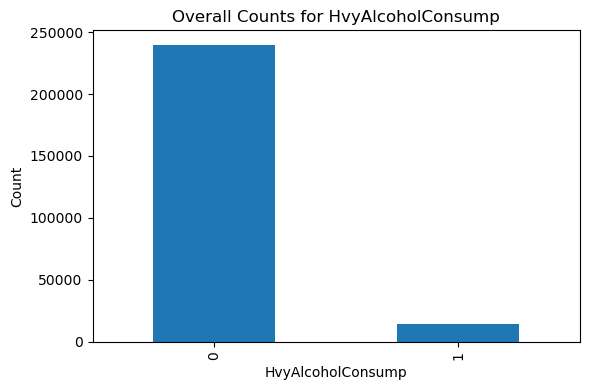

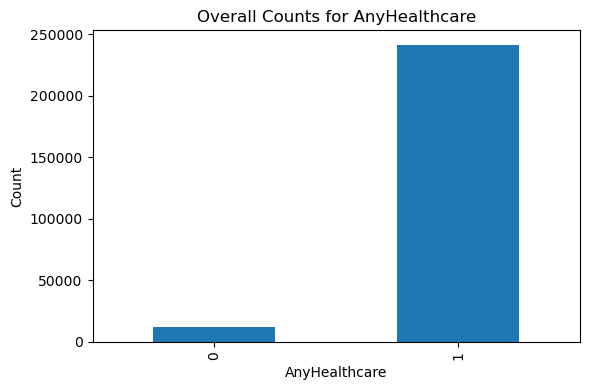

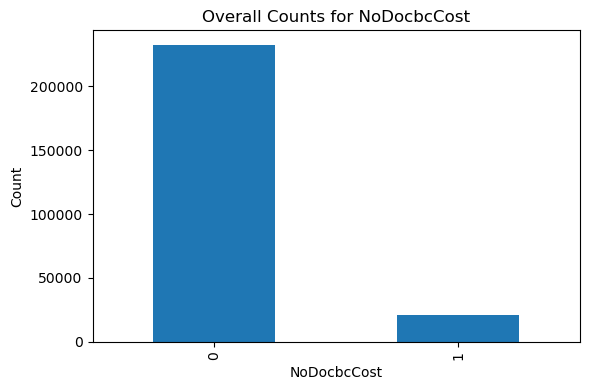

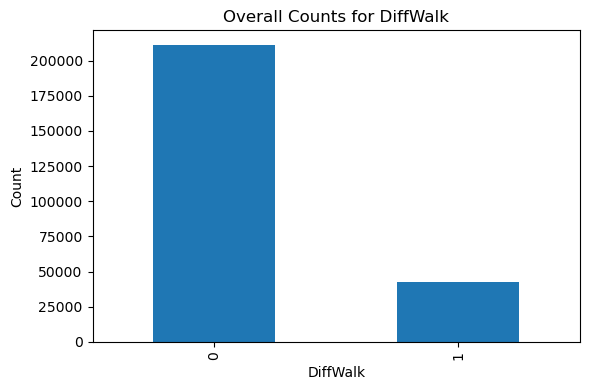

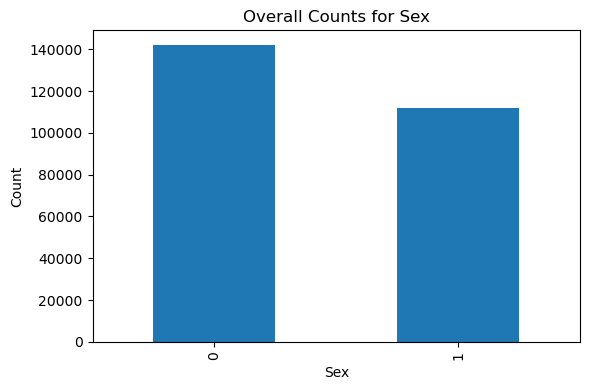

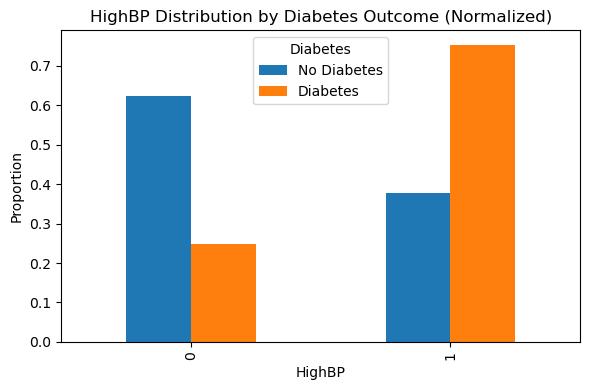

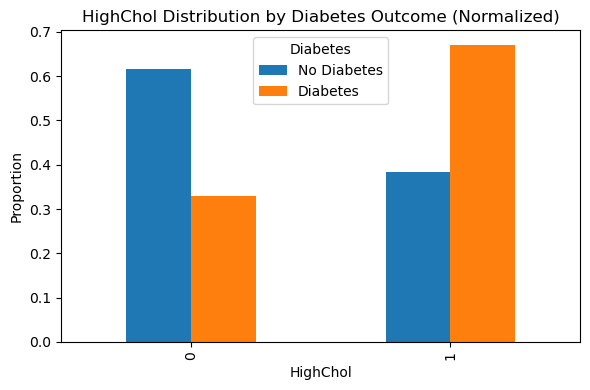

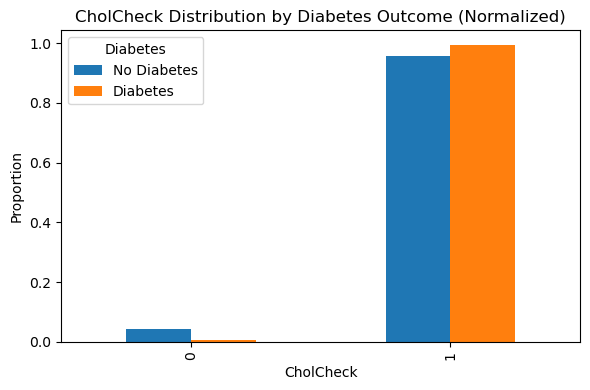

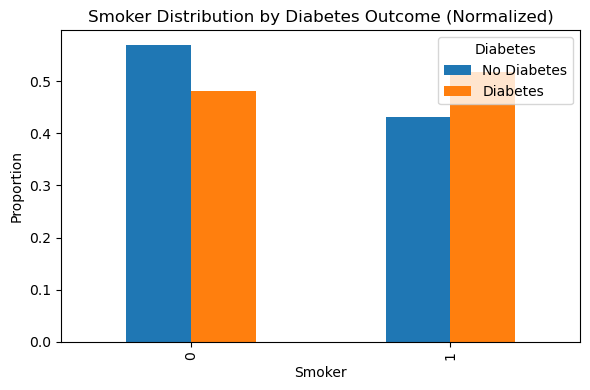

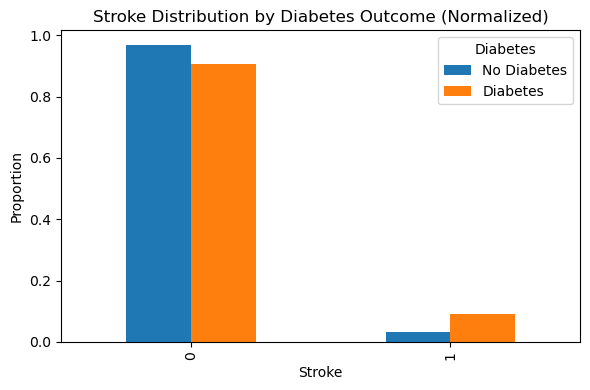

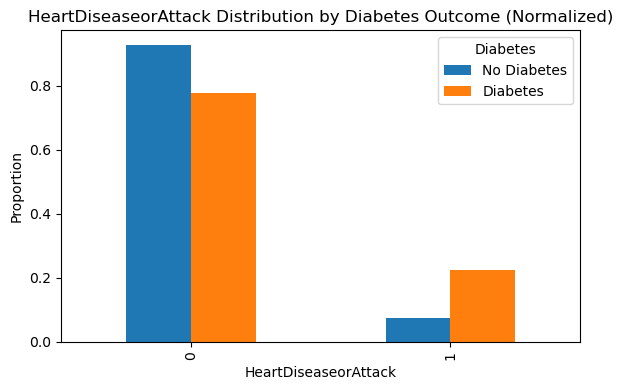

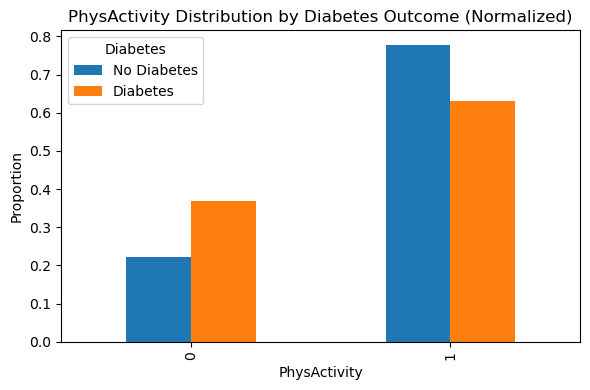

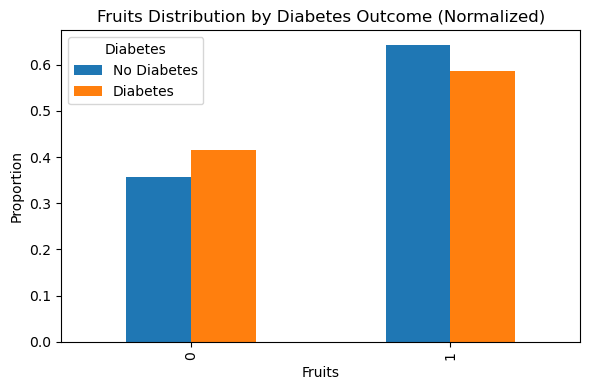

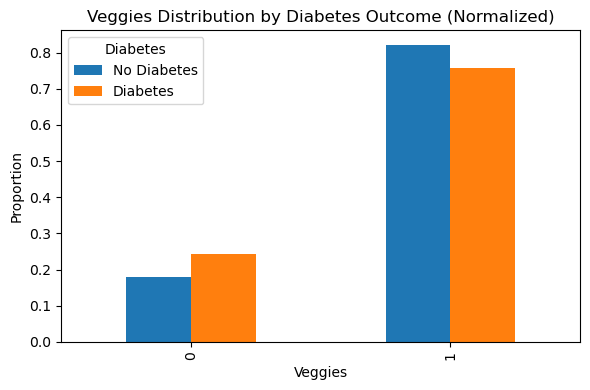

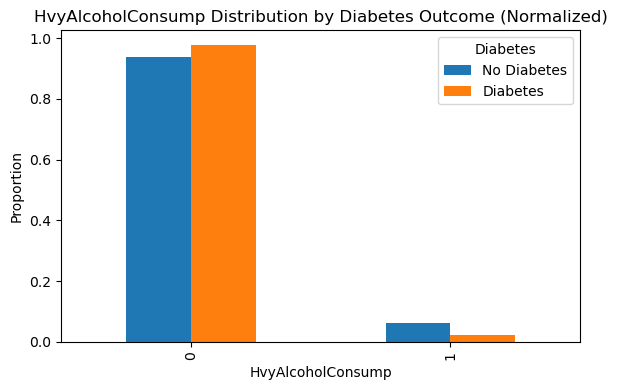

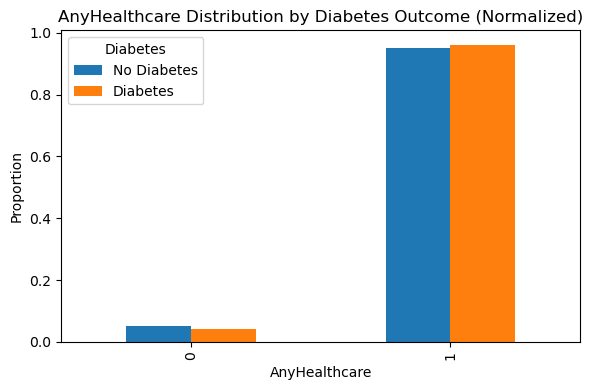

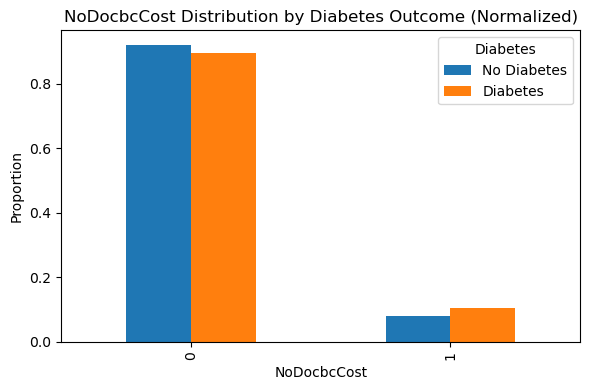

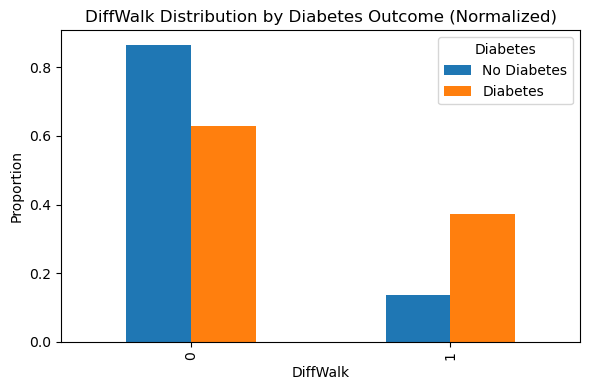

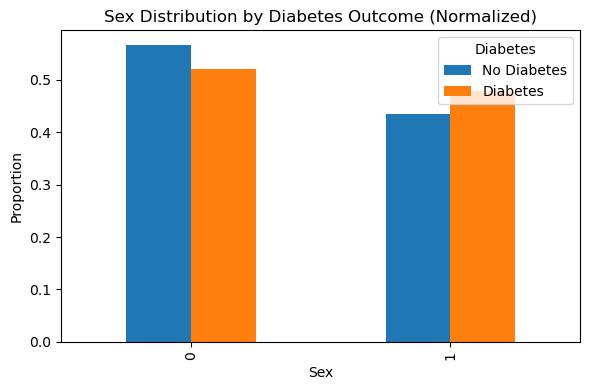

In [10]:
binary_cols = []
for col in df.columns:
    if col != 'Diabetes':
        unique_vals = df[col].dropna().unique()
        if set(unique_vals).issubset({0, 1}):
            binary_cols.append(col)

print("Identified binary columns:", binary_cols)

# Plot 1: Basic count bar chart for each binary feature.
for col in binary_cols:
    plt.figure(figsize=(6, 4))
    counts = df[col].value_counts().sort_index()  # Ensures the order [0, 1]
    counts.plot(kind='bar')
    plt.title(f'Overall Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Plot 2: Grouped bar chart showing normalized distribution of each binary feature by Diabetes outcome.
for col in binary_cols:
    plt.figure(figsize=(6, 4))
    # Create a crosstab for the feature and Diabetes outcome and normalize by Diabetes groups.
    crosstab_norm = pd.crosstab(df[col], df['Diabetes'], normalize='columns')
    crosstab_norm.plot(kind='bar', ax=plt.gca())
    plt.title(f'{col} Distribution by Diabetes Outcome (Normalized)')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
    plt.tight_layout()
    plt.show()

In [8]:
X_new = X.copy()

risk_cols = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
X_new['CardioRiskScore'] = X_new[risk_cols].sum(axis=1)

X_new['WellnessScore'] = X_new['GenHlth'] - ((X_new['MentHlth'] + X_new['PhysHlth']) / 30)

X_new['SES'] = X_new['Education'] + X_new['Income']

X_new['LifestyleScore'] = X_new[['PhysActivity', 'Fruits', 'Veggies']].sum(axis=1) - X_new[['Smoker', 'HvyAlcoholConsump']].sum(axis=1)

X_new['Age_BMI_Interaction'] = X_new['Age'] * X_new['BMI']

X_new['MentalToPhysicalRatio'] = X_new.apply(lambda row: row['MentHlth'] / row['PhysHlth'] if row['PhysHlth'] != 0 else 0, axis=1)

X_new['HealthcareAccess'] = X_new['AnyHealthcare'] - X_new['NoDocbcCost']

In [9]:
X_new.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Age,Education,Income,CardioRiskScore,WellnessScore,SES,LifestyleScore,Age_BMI_Interaction,MentalToPhysicalRatio,HealthcareAccess
0,1,1,1,40,1,0,0,0,0,1,...,9,4,3,4,3.9,7,0,360,1.2,1
1,0,0,0,25,1,0,0,1,0,0,...,7,6,1,1,3.0,7,0,175,0.0,-1
2,1,1,1,28,0,0,0,0,1,0,...,9,4,8,3,3.0,12,1,252,1.0,0
3,1,0,1,27,0,0,0,1,1,1,...,11,3,6,1,2.0,9,3,297,0.0,1
4,1,1,1,24,0,0,0,1,1,1,...,11,5,4,2,1.9,9,3,264,0.0,1
